# 최근접 이웃(K-Nearest Neighbor)

* 특별한 예측 모델 없이 가장 가까운 데이터 포인트를 기반으로 예측을 수행하는 방법
* 분류와 회귀 모두 지원

![k nearest neighbor](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png)

In [2]:
import pandas as pd
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(["seaborn-whitegrid"])

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.datasets import load_boston, fetch_california_housing
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_wine

## K 최근접 이웃 분류

* 입력 데이터 포인트와 가장 가까운 k개의 훈련 데이터 포인트가 출력
* k개의 데이터 포인트 중 가장 많은 클래스가 예측 결과

### 붓꽃 데이터

In [3]:
iris = load_iris()

In [5]:
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['Target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
X ,y = load_iris(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

In [8]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

In [11]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier()

In [13]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("테스트 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9583333333333334
테스트 데이터 점수: 0.9666666666666667


In [14]:
model = KNeighborsClassifier()
model.fit(X_train_scale,y_train)

KNeighborsClassifier()

In [15]:
print("학습 데이터 점수: {}".format(model.score(X_train_scale, y_train)))
print("테스트 데이터 점수: {}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수: 0.95
테스트 데이터 점수: 0.9333333333333333


In [17]:
cross_validate(estimator=KNeighborsClassifier(),X=X, y=y, cv=5, n_jobs = multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.2s finished


{'fit_time': array([0.00130677, 0.0012269 , 0.00106072, 0.00082731, 0.00084019]),
 'score_time': array([0.00284481, 0.00263381, 0.00255919, 0.00232339, 0.00238419]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])}

In [36]:
param_grid = [{'algorithm' : ['ball_tree','kd_tree','brute'],
               'n_neighbors' : [3,5,7],
               'weights': ['uniform','distance']}]

In [37]:
gs = GridSearchCV(
    estimator = KNeighborsClassifier(), param_grid = param_grid, n_jobs = multiprocessing.cpu_count(), verbose=True)

In [38]:
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=2,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [39]:
gs.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7)

In [40]:
print('GridSearchCV best score :{}'.format(gs.best_score_))

GridSearchCV best score :0.9800000000000001


In [60]:
def make_meshgrid(x, y, h=0.02):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  return xx, yy

def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx,yy, Z, **params)

  return out

In [61]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [62]:
iris_comp_df = pd.DataFrame(data=X_comp)
iris_comp_df['Target'] = y
iris_comp_df

,0,1,Target
0,-10.852272,20.763737,0
1,-10.562948,18.373699,0
2,-11.093648,17.949469,0
3,-11.410974,17.760599,0
4,-10.451894,20.784674,0
...,...,...,...
145,11.377395,-11.724513,2
146,9.501795,-9.093566,2
147,10.767566,-10.987491,2
148,12.802300,-10.475281,2


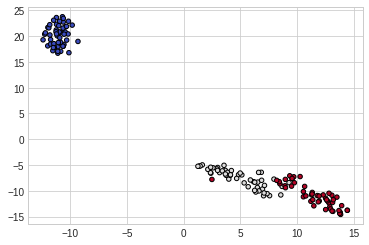

In [63]:
plt.scatter(X_comp[:,0], X_comp[:,1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [64]:
model = KNeighborsClassifier()
model.fit(X_comp, y)

KNeighborsClassifier()

In [65]:
predict = model.predict(X_comp)

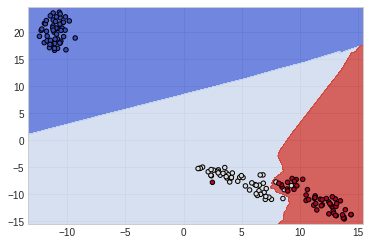

In [66]:
xx, yy = make_meshgrid(X_comp[:,0], X_comp[:,1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:,0], X_comp[:,1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

### 유방암 데이터

In [ ]:
cancer = load_breast_cancer()

In [ ]:
cancer_df = pd.DataFrame(data=cancer.data, columns = cancer.feature_names)
cancer_df['Target'] = cancer.target
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
X,y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
cancer_train_df = pd.DataFrame(data=X_train, columns = cancer.feature_names)
cancer_train_df['Target'] = y_train
cancer_train_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,13.500,12.71,85.69,566.2,0.07376,0.03614,0.002758,0.004419,0.1365,0.05335,...,16.94,95.48,698.7,0.09023,0.05836,0.01379,0.02210,0.2267,0.06192,1
1,14.110,12.88,90.03,616.5,0.09309,0.05306,0.017650,0.027330,0.1373,0.05700,...,18.00,98.40,749.9,0.12810,0.11090,0.05307,0.05890,0.2100,0.07083,1
2,13.480,20.82,88.40,559.2,0.10160,0.12550,0.106300,0.054390,0.1720,0.06419,...,26.02,107.30,740.4,0.16100,0.42250,0.50300,0.22580,0.2807,0.10710,0
3,11.570,19.04,74.20,409.7,0.08546,0.07722,0.054850,0.014280,0.2031,0.06267,...,26.98,86.43,520.5,0.12490,0.19370,0.25600,0.06664,0.3035,0.08284,1
4,12.070,13.44,77.83,445.2,0.11000,0.09009,0.037810,0.027980,0.1657,0.06608,...,15.77,86.92,549.9,0.15210,0.16320,0.16220,0.07393,0.2781,0.08052,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,13.680,16.33,87.76,575.5,0.09277,0.07255,0.017520,0.018800,0.1631,0.06155,...,20.20,101.60,773.4,0.12640,0.15640,0.12060,0.08704,0.2806,0.07782,1
422,15.460,11.89,102.50,736.9,0.12570,0.15550,0.203200,0.109700,0.1966,0.07069,...,17.04,125.00,1102.0,0.15310,0.35830,0.58300,0.18270,0.3216,0.10100,0
423,18.650,17.60,123.70,1076.0,0.10990,0.16860,0.197400,0.100900,0.1907,0.06049,...,21.32,150.60,1567.0,0.16790,0.50900,0.73450,0.23780,0.3799,0.09185,0
424,10.950,21.35,71.90,371.1,0.12270,0.12180,0.104400,0.056690,0.1895,0.06870,...,35.34,87.22,514.0,0.19090,0.26980,0.40230,0.14240,0.2964,0.09606,0


In [ ]:
cancer_test_df = pd.DataFrame(data=X_test, columns = cancer.feature_names)
cancer_test_df['Target'] = y_test
cancer_test_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,14.62,24.02,94.57,662.7,0.08974,0.08606,0.03102,0.02957,0.1685,0.05866,...,29.11,102.90,803.7,0.11150,0.17660,0.09189,0.06946,0.2522,0.07246,1
1,23.29,26.67,158.90,1685.0,0.11410,0.20840,0.35230,0.16200,0.2200,0.06229,...,32.68,177.00,1986.0,0.15360,0.41670,0.78920,0.27330,0.3198,0.08762,0
2,11.52,18.75,73.34,409.0,0.09524,0.05473,0.03036,0.02278,0.1920,0.05907,...,22.47,81.81,506.2,0.12490,0.08720,0.09076,0.06316,0.3306,0.07036,1
3,11.76,18.14,75.00,431.1,0.09968,0.05914,0.02685,0.03515,0.1619,0.06287,...,23.39,85.10,553.6,0.11370,0.07974,0.06120,0.07160,0.1978,0.06915,0
4,18.08,21.84,117.40,1024.0,0.07371,0.08642,0.11030,0.05778,0.1770,0.05340,...,24.70,129.10,1228.0,0.08822,0.19630,0.25350,0.09181,0.2369,0.06558,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,13.47,14.06,87.32,546.3,0.10710,0.11550,0.05786,0.05266,0.1779,0.06639,...,18.32,94.94,660.2,0.13930,0.24990,0.18480,0.13350,0.3227,0.09326,1
139,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,0.05796,...,26.00,124.90,1156.0,0.15460,0.23940,0.37910,0.15140,0.2837,0.08019,0
140,14.60,23.29,93.97,664.7,0.08682,0.06636,0.08390,0.05271,0.1627,0.05416,...,31.71,102.20,758.2,0.13120,0.15810,0.26750,0.13590,0.2477,0.06836,0
141,15.00,15.51,97.45,684.5,0.08371,0.10960,0.06505,0.03780,0.1881,0.05907,...,19.31,114.20,808.2,0.11360,0.36270,0.34020,0.13790,0.2954,0.08362,1


In [ ]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("테스트 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9507042253521126
테스트 데이터 점수: 0.916083916083916


In [ ]:
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train_scale, y_train)))
print("테스트 데이터 점수: {}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수: 0.9765258215962441
테스트 데이터 점수: 0.9370629370629371


In [ ]:
estimator = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [ ]:
cross_validate(estimator=estimator, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    2.1s finished


{'fit_time': array([0.00380397, 0.00343871, 0.00209308, 0.00212646, 0.00203586]),
 'score_time': array([0.00874925, 0.00858974, 0.00801969, 0.0077455 , 0.00872469]),
 'test_score': array([0.96491228, 0.95614035, 0.98245614, 0.95614035, 0.96460177])}

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model',KNeighborsClassifier())])

In [ ]:
param_grid = [{'model__n_neighbors' : [3,5,7],
               'model__weights' : ['uniform','distance'],
               'model__algorithm' : ['ball_tree','kd_tree','brute']}]

In [ ]:
gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

In [ ]:
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=2,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [ ]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7))])

In [ ]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.9701288619779538


In [ ]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

In [ ]:
cancer_comp_df = pd.DataFrame(data=X_comp)
cancer_comp_df['Target'] = y
cancer_comp_df

,0,1,Target
0,26.539373,8.806344,0
1,25.873991,6.156805,0
2,20.925669,6.580410,0
3,-2.337391,-25.221176,0
4,19.660450,8.607743,0
...,...,...,...
564,27.286310,5.148846,0
565,21.925459,7.171205,0
566,1.223017,8.673205,0
567,23.756414,6.988121,0


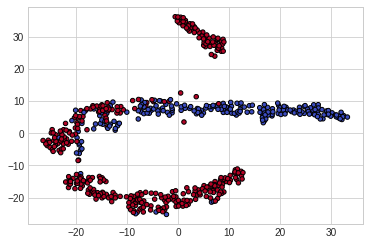

In [ ]:
plt.scatter(X_comp[:,0],X_comp[:,1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolor='k')

In [ ]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

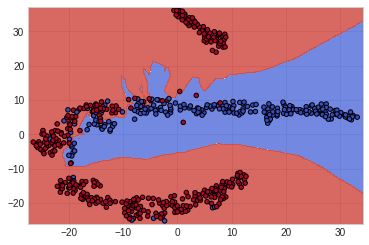

In [ ]:
xx,yy = make_meshgrid(X_comp[:,0], X_comp[:,1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:,0],X_comp[:,1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolor='k')

### 와인 데이터

In [115]:
wine = load_wine()

In [116]:
wine_df = pd.DataFrame(data=wine.data, columns = wine.feature_names)
wine_df['Target'] = wine.target
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [117]:
X,y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [119]:
wine_train_df = pd.DataFrame(data=X_train, columns = wine.feature_names)
wine_train_df['Target'] = y_train
wine_train_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.300000,0.70,1.56,750.0,2
1,13.28,1.64,2.84,15.5,110.0,2.60,2.68,0.34,1.36,4.600000,1.09,2.78,880.0,0
2,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.300000,0.60,1.62,840.0,2
3,12.42,2.55,2.27,22.0,90.0,1.68,1.84,0.66,1.42,2.700000,0.86,3.30,315.0,1
4,13.74,1.67,2.25,16.4,118.0,2.60,2.90,0.21,1.62,5.850000,0.92,3.20,1060.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,11.45,2.40,2.42,20.0,96.0,2.90,2.79,0.32,1.83,3.250000,0.80,3.39,625.0,1
129,12.70,3.87,2.40,23.0,101.0,2.83,2.55,0.43,1.95,2.570000,1.19,3.13,463.0,1
130,12.77,2.39,2.28,19.5,86.0,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470.0,2
131,13.29,1.97,2.68,16.8,102.0,3.00,3.23,0.31,1.66,6.000000,1.07,2.84,1270.0,0


In [120]:
wine_test_df = pd.DataFrame(data=X_test, columns = wine.feature_names)
wine_test_df['Target'] = y_test
wine_test_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,11.66,1.88,1.92,16.0,97.0,1.61,1.57,0.34,1.15,3.80,1.23,2.14,428.0,1
1,11.41,0.74,2.50,21.0,88.0,2.48,2.01,0.42,1.44,3.08,1.10,2.31,434.0,1
2,12.88,2.99,2.40,20.0,104.0,1.30,1.22,0.24,0.83,5.40,0.74,1.42,530.0,2
3,12.29,1.41,1.98,16.0,85.0,2.55,2.50,0.29,1.77,2.90,1.23,2.74,428.0,1
4,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
5,12.29,2.83,2.22,18.0,88.0,2.45,2.25,0.25,1.99,2.15,1.15,3.30,290.0,1
6,11.84,2.89,2.23,18.0,112.0,1.72,1.32,0.43,0.95,2.65,0.96,2.52,500.0,1
7,11.79,2.13,2.78,28.5,92.0,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466.0,1
8,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
9,12.51,1.24,2.25,17.5,85.0,2.00,0.58,0.60,1.25,5.45,0.75,1.51,650.0,2


In [121]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

In [122]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [123]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("테스트 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.7969924812030075
테스트 데이터 점수: 0.6888888888888889


In [124]:
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [125]:
print("학습 데이터 점수: {}".format(model.score(X_train_scale, y_train)))
print("테스트 데이터 점수: {}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수: 0.9774436090225563
테스트 데이터 점수: 0.9111111111111111


In [126]:
estimator = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [127]:
cross_validate(estimator=estimator, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.0s finished


{'fit_time': array([0.00284815, 0.00282097, 0.00206661, 0.00176287, 0.00166678]),
 'score_time': array([0.00363231, 0.00360894, 0.00369644, 0.0028646 , 0.00275731]),
 'test_score': array([0.94444444, 0.94444444, 0.97222222, 1.        , 0.88571429])}

In [128]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model',KNeighborsClassifier())])

In [129]:
param_grid = [{'model__n_neighbors' : [3,5,7],
               'model__weights' : ['uniform','distance'],
               'model__algorithm' : ['ball_tree','kd_tree','brute']}]

In [130]:
gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

In [131]:
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=2,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [133]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7))])

In [134]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.9665079365079364


In [135]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

In [136]:
wine_comp_df = pd.DataFrame(data=X_comp)
wine_comp_df['Target'] = y
wine_comp_df

,0,1,Target
0,-7.069496,-9.917310,0
1,-6.288517,-10.160244,0
2,-8.249016,-11.880013,0
3,-10.234613,-13.948606,0
4,-0.748984,-3.737330,0
...,...,...,...
173,-0.432386,-4.039196,2
174,-0.769357,-4.317245,2
175,-2.844312,-5.995326,2
176,-3.031164,-6.044503,2


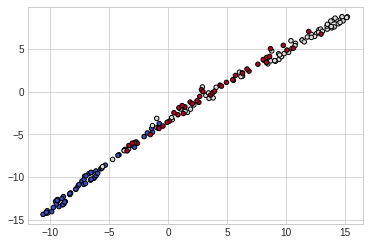

In [137]:
plt.scatter(X_comp[:,0],X_comp[:,1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolor='k')

In [138]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

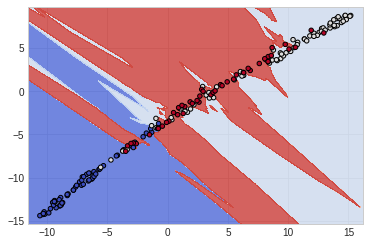

In [139]:
xx,yy = make_meshgrid(X_comp[:,0], X_comp[:,1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:,0],X_comp[:,1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolor='k')

## k 최근접 이웃 회귀

* k 최근접 이웃 분류와 마찬가지로 예측에 이웃 데이터 포인트 사용
* 이웃 데이터 포인트의 평균이 예측 결과

### 보스턴 주택 가격 데이터

In [4]:
boston = load_boston()

In [5]:
boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_df['Target']=boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [6]:
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
boston_train_df = pd.DataFrame(data=X_train, columns=boston.feature_names)
boston_train_df['Target'] = y_train
boston_train_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.11132,0.0,27.74,0.0,0.609,5.983,83.5,2.1099,4.0,711.0,20.1,396.90,13.35,20.1
1,6.65492,0.0,18.10,0.0,0.713,6.317,83.0,2.7344,24.0,666.0,20.2,396.90,13.99,19.5
2,14.43830,0.0,18.10,0.0,0.597,6.852,100.0,1.4655,24.0,666.0,20.2,179.36,19.78,27.5
3,0.13587,0.0,10.59,1.0,0.489,6.064,59.1,4.2392,4.0,277.0,18.6,381.32,14.66,24.4
4,13.91340,0.0,18.10,0.0,0.713,6.208,95.0,2.2222,24.0,666.0,20.2,100.63,15.17,11.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.85204,0.0,8.14,0.0,0.538,5.965,89.2,4.0123,4.0,307.0,21.0,392.53,13.83,19.6
400,0.12932,0.0,13.92,0.0,0.437,6.678,31.1,5.9604,4.0,289.0,16.0,396.90,6.27,28.6
401,0.63796,0.0,8.14,0.0,0.538,6.096,84.5,4.4619,4.0,307.0,21.0,380.02,10.26,18.2
402,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6


In [8]:
boston_test_df = pd.DataFrame(data=X_test, columns=boston.feature_names)
boston_test_df['Target'] = y_test
boston_test_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,67.92080,0.0,18.10,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0
1,5.58107,0.0,18.10,0.0,0.713,6.436,87.9,2.3158,24.0,666.0,20.2,100.19,16.22,14.3
2,0.16902,0.0,25.65,0.0,0.581,5.986,88.4,1.9929,2.0,188.0,19.1,385.02,14.81,21.4
3,0.02498,0.0,1.89,0.0,0.518,6.540,59.7,6.2669,1.0,422.0,15.9,389.96,8.65,16.5
4,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80,16.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2.92400,0.0,19.58,0.0,0.605,6.101,93.0,2.2834,5.0,403.0,14.7,240.16,9.81,25.0
98,0.78420,0.0,8.14,0.0,0.538,5.990,81.7,4.2579,4.0,307.0,21.0,386.75,14.67,17.5
99,0.26938,0.0,9.90,0.0,0.544,6.266,82.8,3.2628,4.0,304.0,18.4,393.39,7.90,21.6
100,3.16360,0.0,18.10,0.0,0.655,5.759,48.2,3.0665,24.0,666.0,20.2,334.40,14.13,19.9


In [9]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [11]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)

KNeighborsRegressor()

In [13]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("테스트 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.7007311379711368
테스트 데이터 점수: 0.5036208539283606


In [14]:
model = KNeighborsRegressor()
model.fit(X_train_scale, y_train)

KNeighborsRegressor()

In [15]:
print("학습 데이터 점수: {}".format(model.score(X_train_scale, y_train)))
print("테스트 데이터 점수: {}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수: 0.8436160208517482
테스트 데이터 점수: 0.7282202104661164


In [16]:
estimator = make_pipeline(StandardScaler(), KNeighborsRegressor())

In [17]:
cross_validate(estimator=estimator, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.1s finished


{'fit_time': array([0.00299048, 0.00288439, 0.00274563, 0.00202298, 0.00190067]),
 'score_time': array([0.00299883, 0.00298691, 0.00238085, 0.00230527, 0.00195622]),
 'test_score': array([0.56089547, 0.61917359, 0.48661916, 0.46986886, 0.23133037])}

In [18]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model',KNeighborsRegressor())])

In [19]:
param_grid = [{'model__n_neighbors' : [3,5,7],
               'model__weights' : ['uniform','distance'],
               'model__algorithm' : ['ball_tree','kd_tree','brute']}]

In [20]:
gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

In [21]:
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=2,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [22]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7,
                                     weights='distance'))])

In [23]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.4973060611762845


In [28]:
tsne = TSNE(n_components=1)
X_comp = tsne.fit_transform(X)

In [29]:
boston_comp_df = pd.DataFrame(data=X_comp)
boston_comp_df['Target'] = y
boston_comp_df

,0,Target
0,-23.607700,24.0
1,-40.565418,21.6
2,-41.369175,34.7
3,-42.855835,33.4
4,-43.011044,36.2
...,...,...
501,-26.620369,22.4
502,-27.276394,20.6
503,-28.074389,23.9
504,-28.027889,22.0


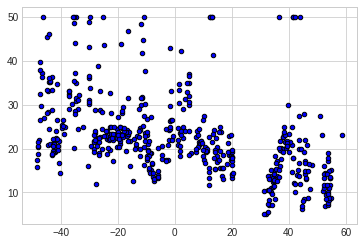

In [30]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolor='k')

In [31]:
model = KNeighborsRegressor()
model.fit(X_comp, y)
predict = model.predict(X_comp)

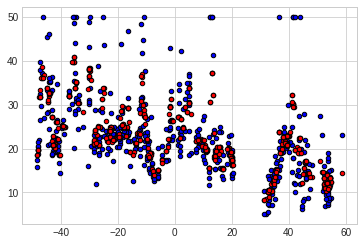

In [32]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolor='k')
plt.scatter(X_comp, predict, c='r', cmap=plt.cm.coolwarm, s=20, edgecolor='k')

### 캘리포니아 주택 가격 데이터

In [33]:
california = fetch_california_housing()

In [34]:
california_df = pd.DataFrame(data=california.data, columns=california.feature_names)
california_df['Target']=california.target
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [35]:
X, y = california.data, california.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
california_train_df = pd.DataFrame(data=X_train, columns=california.feature_names)
california_train_df['Target'] = y_train
california_train_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,2.0000,17.0,4.022936,1.004587,966.0,4.431193,36.42,-119.09,0.525
1,7.6864,16.0,7.107544,1.065811,1677.0,2.691814,37.53,-122.25,4.225
2,1.4007,20.0,3.902111,1.124760,1281.0,2.458733,38.50,-121.44,0.975
3,2.0304,51.0,4.642032,1.062356,1355.0,3.129330,34.02,-118.32,1.334
4,3.9329,17.0,5.193220,0.996610,1704.0,2.888136,38.45,-122.74,1.709
...,...,...,...,...,...,...,...,...,...
16507,2.0694,18.0,6.889855,1.557971,1366.0,1.979710,35.72,-118.47,0.812
16508,4.9504,5.0,5.630108,1.036559,4361.0,3.126165,38.13,-122.19,2.148
16509,1.4146,22.0,4.314286,1.088095,1592.0,3.790476,35.39,-118.98,0.491
16510,2.7348,52.0,4.071279,0.997904,1375.0,2.882600,34.12,-118.26,2.091


In [37]:
california_test_df = pd.DataFrame(data=X_test, columns=california.feature_names)
california_test_df['Target'] = y_test
california_test_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,3.0089,40.0,5.246544,1.170507,1718.0,3.958525,37.34,-121.86,1.85200
1,4.3864,15.0,5.691450,1.085502,1624.0,3.018587,37.67,-120.95,1.37600
2,5.8440,26.0,6.334877,0.983025,2072.0,3.197531,33.82,-118.04,2.73900
3,13.9470,29.0,8.494816,1.052780,2919.0,2.751178,34.11,-118.51,5.00001
4,3.9191,17.0,5.798936,1.072340,3533.0,3.758511,34.06,-117.40,1.01600
...,...,...,...,...,...,...,...,...,...
4123,4.2972,34.0,4.133459,0.994361,1193.0,2.242481,37.44,-122.16,4.05900
4124,6.0352,23.0,4.831633,1.061224,769.0,1.961735,34.12,-118.33,5.00001
4125,1.9052,38.0,4.203774,1.077358,1697.0,3.201887,34.00,-117.41,0.83400
4126,2.0672,37.0,2.830843,1.056564,3895.0,2.078442,34.10,-118.30,2.83300


In [38]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [39]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)

KNeighborsRegressor()

In [40]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("테스트 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.45127413746946654
테스트 데이터 점수: 0.16094913002489386


In [41]:
model = KNeighborsRegressor()
model.fit(X_train_scale, y_train)

KNeighborsRegressor()

In [42]:
print("학습 데이터 점수: {}".format(model.score(X_train_scale, y_train)))
print("테스트 데이터 점수: {}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수: 0.7898953383532454
테스트 데이터 점수: 0.6883624839086007


In [43]:
estimator = make_pipeline(StandardScaler(), KNeighborsRegressor())

In [44]:
cross_validate(estimator=estimator, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    2.3s finished


{'fit_time': array([0.03615737, 0.03465891, 0.04133368, 0.03522038, 0.03169823]),
 'score_time': array([0.54136848, 0.44606113, 0.46088243, 0.54681611, 0.33533287]),
 'test_score': array([0.47879396, 0.4760079 , 0.57624554, 0.50259828, 0.57228584])}

In [45]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model',KNeighborsRegressor())])

In [46]:
param_grid = [{'model__n_neighbors' : [3,5,7],
               'model__weights' : ['uniform','distance'],
               'model__algorithm' : ['ball_tree','kd_tree','brute']}]

In [47]:
gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

In [48]:
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=2,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [49]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7,
                                     weights='distance'))])

In [50]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.5376515274379832


In [51]:
tsne = TSNE(n_components=1)
X_comp = tsne.fit_transform(X)

In [52]:
boston_comp_df = pd.DataFrame(data=X_comp)
boston_comp_df['Target'] = y
boston_comp_df

,0,Target
0,-32.617367,4.526
1,-76.611191,3.585
2,46.920177,3.521
3,52.179401,3.413
4,53.482731,3.422
...,...,...
20635,-4.435463,0.781
20636,-31.281418,0.771
20637,74.229797,0.923
20638,-17.162325,0.847


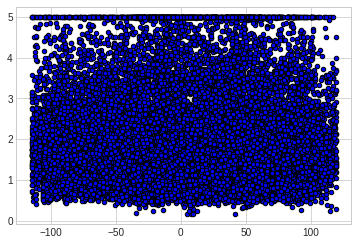

In [53]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolor='k')

In [54]:
model = KNeighborsRegressor()
model.fit(X_comp, y)
predict = model.predict(X_comp)

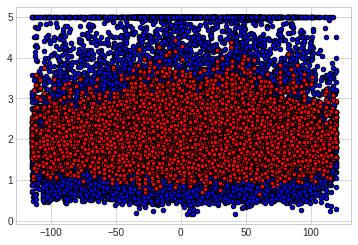

In [55]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolor='k')
plt.scatter(X_comp, predict, c='r', cmap=plt.cm.coolwarm, s=20, edgecolor='k')